In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import snapshot as sn
import h5py
import random

In [2]:
basePath = '../sims.TNG/TNG100-2/output/'
SnapNum = 99

In [3]:
header = il.groupcat.loadHeader(basePath, SnapNum)
header

{'BoxSize': 75000.0,
 'FlagDoubleprecision': 0,
 'Git_commit': b'd203ec8b07c7e2bdda5f608aa0babea46d603699',
 'Git_date': b'Thu Apr 7 14:14:27 2016 +0200',
 'HubbleParam': 0.6774,
 'Ngroups_ThisFile': 2,
 'Ngroups_Total': 848588,
 'Nids_ThisFile': 10413099,
 'Nids_Total': 616789913,
 'Nsubgroups_ThisFile': 5514,
 'Nsubgroups_Total': 698336,
 'NumFiles': 56,
 'Omega0': 0.3089,
 'OmegaLambda': 0.6911,
 'Redshift': 2.220446049250313e-16,
 'Time': 0.9999999999999998}

In [4]:
h = header['HubbleParam']
z = header['Redshift']
a = header['Time']
omega_0 = header['Omega0']
h, z, a, omega_0

(0.6774, 2.220446049250313e-16, 0.9999999999999998, 0.3089)

In [5]:
# Defining a function for unit conversion
def UnitConversion(array, unit):
    if unit == 'mass':
        array = array * 1e10 / h # In Msun unit
    if unit == 'length':
        array = array * a / (1e3 * h) # In Mpc unit
    return array

In [6]:
hub_const = h * 1e2 * 1e3 / (1e6 * 3.09e16) # H = 100*h, where h = 0.6774 km/s/Mpc
hub_const # s^-1 units

2.192233009708738e-18

In [6]:
hub_const = h * 1e2 * 1e3 / (1e6 * 3.09e16) # H = 100*h, where h = 0.6774 km/s/Mpc
hub_const # s^-1 units

2.192233009708738e-18

In [7]:
critical_den = format(3 * hub_const**2 / (8 * np.pi * 6.67e-11), '.3e')
critical_den

'8.601e-27'

In [8]:
critical_density = float(critical_den) * ((3.09e16 * 1e6)**3 / 2e30) # In Msun/Mpc^3 units
print('%.3g' % critical_density)

1.27e+11


In [9]:
mean_density = omega_0 * critical_density 
print('%.3g' % mean_density)

3.92e+10


In [10]:
c_200 = 200 * critical_density
c_500 = 500 * critical_density
m_200 = 200 * mean_density

In [11]:
total_halos = header['Ngroups_Total']
total_halos

848588

In [12]:
n = 10 # Number of halos to take

In [13]:
# random.seed(10) # To generate the same values everytime
haloIDs = random.sample(range(100), n) # To check for large number of particles
# haloIDs = random.sample(range(total_halos), n)
haloIDs.sort() # To ensure that the IDs are in order
haloIDs

[12, 16, 34, 67, 70, 73, 79, 85, 93, 98]

In [14]:
fields = ['GroupPos', 'GroupLenType', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_M_Crit200', 'Group_M_Crit500','Group_M_Mean200']
halos = il.groupcat.loadHalos(basePath, SnapNum, fields=fields)

In [15]:
halo_pos_req = halos['GroupPos'][haloIDs]
halo_len_req = halos['GroupLenType'][haloIDs]

In [16]:
snapshot_path = sn.snapPath(basePath, 99)
hdf = h5py.File(snapshot_path, 'r')
masses = hdf['Header'].attrs['MassTable']
mass_dm = UnitConversion(masses[1], 'mass')
mass_dm

59707622.84463827

In [17]:
halo_pos_req

array([[18214.668 ,   675.9695,  9023.988 ],
       [43430.426 , 67869.54  , 44422.414 ],
       [70301.695 , 59598.824 , 55632.195 ],
       [31423.031 , 23646.219 , 44937.637 ],
       [23824.846 , 65502.938 , 23182.332 ],
       [17796.955 , 43743.44  , 32269.477 ],
       [53245.383 , 30840.803 ,  1330.5559],
       [ 8735.086 , 34832.12  , 59718.66  ],
       [19611.963 , 11050.23  ,  5719.7646],
       [31996.123 , 29510.334 , 73200.01  ]], dtype=float32)

In [18]:
halo_len_req

array([[1537847, 2493592,       0,       0,  251228,      70],
       [1199521, 1680807,       0,       0,  200239,      42],
       [ 680883, 1113541,       0,       0,  113296,      26],
       [ 318410,  638858,       0,       0,   87264,      18],
       [ 331605,  602438,       0,       0,   64243,      20],
       [ 278799,  540621,       0,       0,   84420,      11],
       [ 232973,  471084,       0,       0,   51956,      15],
       [ 193205,  446914,       0,       0,   52243,      17],
       [ 200977,  394541,       0,       0,   40267,      11],
       [ 168909,  381266,       0,       0,   47561,      12]],
      dtype=int32)

In [19]:
act_r_crit200 = UnitConversion(halos['Group_R_Crit200'][haloIDs], 'length')
act_m_crit200 = UnitConversion(halos['Group_M_Crit200'][haloIDs], 'mass')
act_r_crit500 = UnitConversion(halos['Group_R_Crit500'][haloIDs], 'length')
act_m_crit500 = UnitConversion(halos['Group_M_Crit500'][haloIDs], 'mass')
act_r_mean200 = UnitConversion(halos['Group_R_Mean200'][haloIDs], 'length')
act_m_mean200 = UnitConversion(halos['Group_M_Mean200'][haloIDs], 'mass')

In [20]:
group_r_crit200 = np.zeros(n)
group_m_crit200 = np.zeros(n)
group_r_crit500 = np.zeros(n)
group_m_crit500 = np.zeros(n)
group_r_mean200 = np.zeros(n)
group_m_mean200 = np.zeros(n)

In [21]:
for i in range(n):
    
    dist = []
    mass = []
    
    if halo_len_req[i, 0] != 0:
        p0 = sn.loadHalo(basePath, SnapNum, haloIDs[i], 0, fields=['Coordinates', 'Masses'])
        dist.extend(np.array(UnitConversion(np.linalg.norm(p0['Coordinates'] - halo_pos_req[i], axis=1), 'length')))
        mass.extend(np.array(UnitConversion(p0['Masses'], 'mass')))
        
    if halo_len_req[i, 1] != 0:
        p1 = sn.loadHalo(basePath, SnapNum, haloIDs[i], 1, fields=['Coordinates'])
        dist.extend(np.array(UnitConversion(np.linalg.norm(p1 - halo_pos_req[i], axis=1), 'length')))
        mass.extend(np.full(halo_len_req[i, 1], mass_dm))
        
    if halo_len_req[i, 4] != 0:
        p4 = sn.loadHalo(basePath, SnapNum, haloIDs[i], 4, fields=['Coordinates', 'Masses'])
        dist.extend(np.array(UnitConversion(np.linalg.norm(p4['Coordinates'] - halo_pos_req[i], axis=1), 'length')))
        mass.extend(np.array(UnitConversion(p4['Masses'], 'mass')))
        
    if halo_len_req[i, 5] != 0:
        p5 = sn.loadHalo(basePath, SnapNum, haloIDs[i], 5, fields=['Coordinates', 'Masses'])
        dist.extend(np.array(UnitConversion(np.linalg.norm(p5['Coordinates'] - halo_pos_req[i], axis=1), 'length')))
        mass.extend(np.array(UnitConversion(p5['Masses'], 'mass')))

    sorted_mass = np.take_along_axis(np.array(mass), np.argsort(dist), axis=None)
    sorted_dist = np.take_along_axis(np.array(dist), np.argsort(dist), axis=None)
    cum_mass = np.cumsum(sorted_mass)

    for j in range(len(dist)):
        rad = sorted_dist[j]
        wgt = cum_mass[j]
        density = 3 * wgt / (4 * np.pi * rad**3)
        if density/1e13 <= c_200/1e13:
            group_r_crit200[i] = rad
            group_m_crit200[i] = wgt
            break

    for k in range(len(dist)):
        rad = sorted_dist[k]
        wgt = cum_mass[k]
        density = 3 * wgt / (4 * np.pi * rad**3)
        if density/1e13 <= c_500/1e13:
            group_r_crit500[i] = rad
            group_m_crit500[i] = wgt
            break

    for l in range(len(dist)):
        rad = sorted_dist[l]
        wgt = cum_mass[l]
        density = 3 * wgt / (4 * np.pi * rad**3)
        if density/1e13 <= m_200/1e13:
            group_r_mean200[i] = rad
            group_m_mean200[i] = wgt
            break

For 200,Crit
haloID 	 Cal_R_Crit200 	 Act_R_Crit200 	 Cal_M_Crit200 	 Act_M_Crit200
12 	 9.044e-01 	 9.089e-01 	 7.863e+13 	 8.010e+13
16 	 9.917e-01 	 9.963e-01 	 1.037e+14 	 1.055e+14
34 	 8.294e-01 	 8.339e-01 	 6.064e+13 	 6.185e+13
67 	 5.977e-01 	 5.995e-01 	 2.270e+13 	 2.298e+13
70 	 6.009e-01 	 6.013e-01 	 2.306e+13 	 2.319e+13
73 	 6.338e-01 	 6.351e-01 	 2.707e+13 	 2.733e+13
79 	 6.164e-01 	 6.161e-01 	 2.489e+13 	 2.495e+13
85 	 5.530e-01 	 5.534e-01 	 1.798e+13 	 1.808e+13
93 	 5.429e-01 	 5.431e-01 	 1.701e+13 	 1.709e+13
98 	 5.753e-01 	 5.751e-01 	 2.024e+13 	 2.029e+13


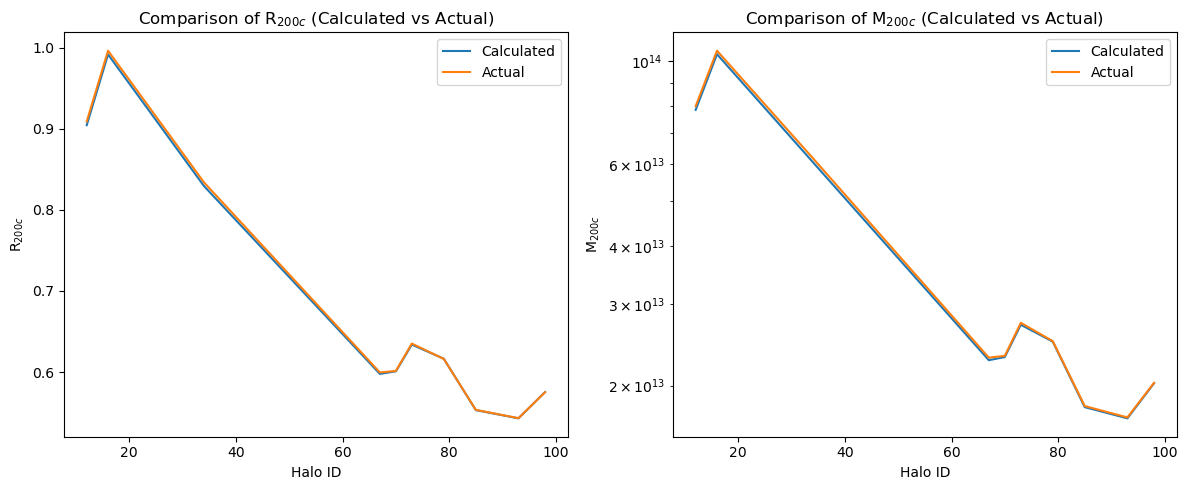

In [22]:
print('For 200,Crit')
print('haloID','\t','Cal_R_Crit200','\t','Act_R_Crit200','\t','Cal_M_Crit200','\t','Act_M_Crit200')
for i in range(n):
    print(haloIDs[i],'\t',format(group_r_crit200[i],'.3e'),'\t',format(act_r_crit200[i],'.3e'),'\t',format(group_m_crit200[i],'.3e'),'\t',format(act_m_crit200[i],'.3e'))
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.plot(haloIDs, group_r_crit200, label='Calculated')
ax1.plot(haloIDs, act_r_crit200, label='Actual')
ax1.set_xlabel('Halo ID')
ax1.set_ylabel('R$_{200c}$')
ax1.set_title('Comparison of R$_{200c}$ (Calculated vs Actual)')
ax1.legend()
ax2.plot(haloIDs, group_m_crit200, label='Calculated')
ax2.plot(haloIDs, act_m_crit200, label='Actual')
ax2.set_xlabel('Halo ID')
ax2.set_ylabel('M$_{200c}$')
ax2.set_yscale('log')
ax2.set_title('Comparison of M$_{200c}$ (Calculated vs Actual)')
ax2.legend()

plt.tight_layout()
plt.show()

For 500,Crit
haloID 	 Cal_R_Crit500 	 Act_R_Crit500 	 Cal_M_Crit500 	 Act_M_Crit500
12 	 5.418e-01 	 5.405e-01 	 4.226e+13 	 4.211e+13
16 	 6.616e-01 	 6.605e-01 	 7.694e+13 	 7.684e+13
34 	 5.232e-01 	 5.222e-01 	 3.807e+13 	 3.798e+13
67 	 3.502e-01 	 3.491e-01 	 1.141e+13 	 1.135e+13
70 	 3.769e-01 	 3.762e-01 	 1.423e+13 	 1.419e+13
73 	 4.132e-01 	 4.125e-01 	 1.874e+13 	 1.872e+13
79 	 4.005e-01 	 3.998e-01 	 1.707e+13 	 1.705e+13
85 	 3.640e-01 	 3.635e-01 	 1.282e+13 	 1.280e+13
93 	 3.504e-01 	 3.498e-01 	 1.143e+13 	 1.142e+13
98 	 3.799e-01 	 3.793e-01 	 1.457e+13 	 1.455e+13


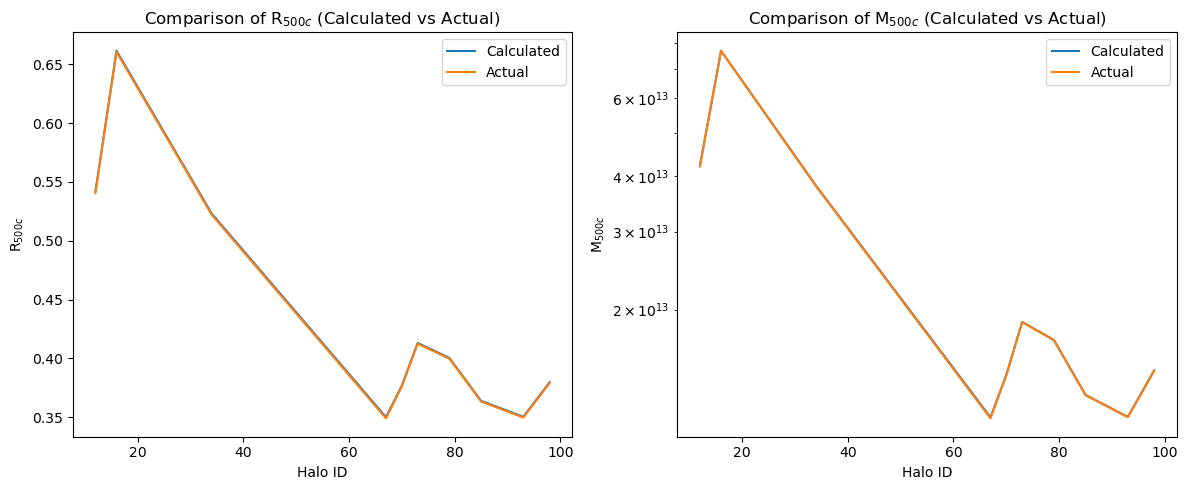

In [23]:
print('For 500,Crit')
print('haloID','\t','Cal_R_Crit500','\t','Act_R_Crit500','\t','Cal_M_Crit500','\t','Act_M_Crit500')
for i in range(n):
    print(haloIDs[i],'\t',format(group_r_crit500[i],'.3e'),'\t',format(act_r_crit500[i],'.3e'),'\t',format(group_m_crit500[i],'.3e'),'\t',format(act_m_crit500[i],'.3e'))
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.plot(haloIDs, group_r_crit500, label='Calculated')
ax1.plot(haloIDs, act_r_crit500, label='Actual')
ax1.set_xlabel('Halo ID')
ax1.set_ylabel('R$_{500c}$')
ax1.set_title('Comparison of R$_{500c}$ (Calculated vs Actual)')
ax1.legend()
ax2.plot(haloIDs, group_m_crit500, label='Calculated')
ax2.plot(haloIDs, act_m_crit500, label='Actual')
ax2.set_xlabel('Halo ID')
ax2.set_ylabel('M$_{500c}$')
ax2.set_yscale('log')
ax2.set_title('Comparison of M$_{500c}$ (Calculated vs Actual)')
ax2.legend()

plt.tight_layout()
plt.show()

For 200,Mean
haloID 	 Cal_R_Mean200 	 Act_R_Mean200 	 Cal_M_Mean200 	 Act_M_Mean200
12 	 1.658e+00 	 1.753e+00 	 1.496e+14 	 1.775e+14
16 	 1.518e+00 	 1.599e+00 	 1.148e+14 	 1.346e+14
34 	 1.314e+00 	 1.392e+00 	 7.451e+13 	 8.882e+13
67 	 1.060e+00 	 1.108e+00 	 3.911e+13 	 4.487e+13
70 	 1.008e+00 	 1.059e+00 	 3.365e+13 	 3.917e+13
73 	 1.027e+00 	 1.082e+00 	 3.557e+13 	 4.179e+13
79 	 9.616e-01 	 1.013e+00 	 2.920e+13 	 3.421e+13
85 	 8.989e-01 	 9.539e-01 	 2.385e+13 	 2.860e+13
93 	 8.607e-01 	 9.092e-01 	 2.093e+13 	 2.476e+13
98 	 8.958e-01 	 9.486e-01 	 2.361e+13 	 2.813e+13


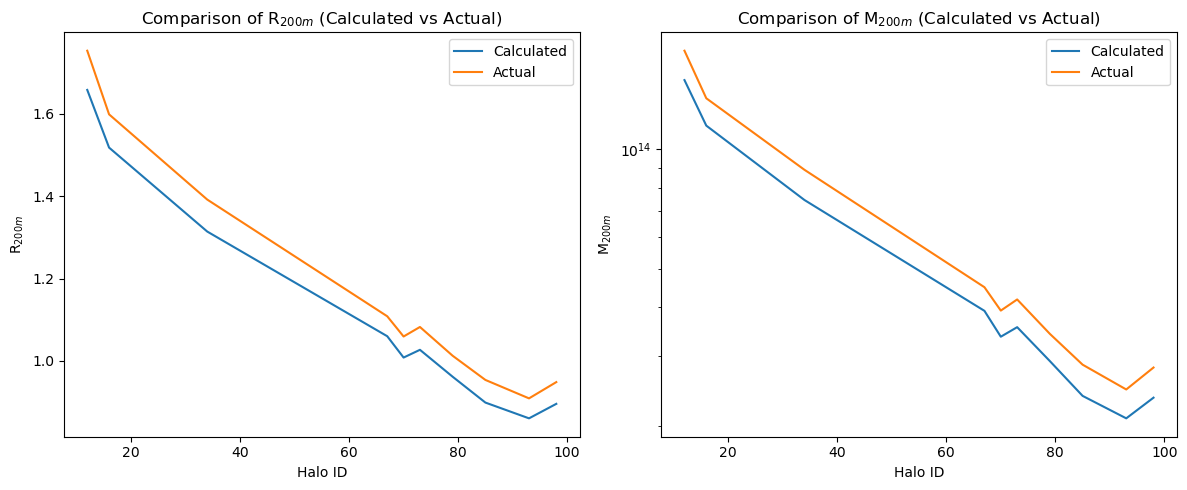

In [24]:
print('For 200,Mean')
print('haloID','\t','Cal_R_Mean200','\t','Act_R_Mean200','\t','Cal_M_Mean200','\t','Act_M_Mean200')
for i in range(n):
    print(haloIDs[i],'\t',format(group_r_mean200[i],'.3e'),'\t',format(act_r_mean200[i],'.3e'),'\t',format(group_m_mean200[i],'.3e'),'\t',format(act_m_mean200[i],'.3e'))
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.plot(haloIDs, group_r_mean200, label='Calculated')
ax1.plot(haloIDs, act_r_mean200, label='Actual')
ax1.set_xlabel('Halo ID')
ax1.set_ylabel('R$_{200m}$')
ax1.set_title('Comparison of R$_{200m}$ (Calculated vs Actual)')
ax1.legend()
ax2.plot(haloIDs, group_m_mean200, label='Calculated')
ax2.plot(haloIDs, act_m_mean200, label='Actual')
ax2.set_xlabel('Halo ID')
ax2.set_ylabel('M$_{200m}$')
ax2.set_yscale('log')
ax2.set_title('Comparison of M$_{200m}$ (Calculated vs Actual)')
ax2.legend()

plt.tight_layout()
plt.show()

Comments: $\newline$
-> The calculated values for 200,Crit and 500,Crit are consistent with the actual values mentioned in the catalog. $\newline$
-> There is a slight discrepancy between the calculated values and the actual values for 200,Mean. $\newline$
-> This could be due to the definition of mean density of the universe assumed in the beginning. $\newline$